<a href="https://colab.research.google.com/github/SanthoshToorpu/Audio-Classififcation/blob/main/NOISE_CANCELLATION_85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environmental Sound Classification

* this kernel is useful for any audio classification task.
* the following libraries are used in this kernel
    1. Tensorflow (for model making and training)
    2. sklearn (for splitting the data into trian,test,validation)
    3. librosa (for loading and feature extraction of audio signals)
    4. pandas (for reading csv file)
    5. matplotlib (for plotting)

## Step 1. Importing Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Step 2. Loading and Preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
CSV_FILE_PATH = "/content/drive/MyDrive/archive (1)/esc50.csv"  # path of csv file
DATA_PATH = "/content/drive/MyDrive/archive (1)/audio/audio/44100" # path to folder containing audio files

In [32]:
!pip install pydub

In [37]:
import os
import random
from pydub import AudioSegment
from pydub.playback import play

def play_random_audio(data_path):
  # Finding all files using os.listdir
    audio_files = []
    for file in os.listdir(DATA_PATH):
      if file.endswith(('.wav')):
        audio_files.append(file)

    # Check if there are any audio files
    if not audio_files:
        print(f"No audio files found in the specified directory '{data_path}'.")
        return

    # Choose a random audio file
    random_audio_file = random.choice(audio_files)
    audio_file_path = os.path.join(data_path, random_audio_file)

    # Load the audio file using pydub
    audio = AudioSegment.from_file(audio_file_path)

    # Play the audio
    print(f"Playing randomly selected audio file: {random_audio_file}")
    play(audio)

# Replace 'your_data_path' with the actual path to your audio data
play_random_audio(DATA_PATH)


Playing randomly selected audio file: 2-153388-A-31.wav


In [38]:
#reading the csv file
df = pd.read_csv(CSV_FILE_PATH)
df

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


> Out of 50 classes we will be using 10 classes.
> dataframe has column "esc10" which contains 10 classes. So, we will be using that 10 classes only.

In [39]:
df_10 = df[df['esc10']==True]
df_10 = df_10.drop(['fold','esc10','src_file','take'], axis=1)
df_10

,filename,target,category
0,1-100032-A-0.wav,0,dog
14,1-110389-A-0.wav,0,dog
24,1-116765-A-41.wav,41,chainsaw
54,1-17150-A-12.wav,12,crackling_fire
55,1-172649-A-40.wav,40,helicopter
...,...,...,...
1876,5-233160-A-1.wav,1,rooster
1888,5-234879-A-1.wav,1,rooster
1889,5-234879-B-1.wav,1,rooster
1894,5-235671-A-38.wav,38,clock_tick


* editing target column according to the 10 classes.

In [40]:
classes = df_10['category'].unique()
classes

array(['dog', 'chainsaw', 'crackling_fire', 'helicopter', 'rain',
       'crying_baby', 'clock_tick', 'sneezing', 'rooster', 'sea_waves'],
      dtype=object)

In [41]:
class_dict = {i:x for x,i in enumerate(classes)}
class_dict

{'dog': 0,
 'chainsaw': 1,
 'crackling_fire': 2,
 'helicopter': 3,
 'rain': 4,
 'crying_baby': 5,
 'clock_tick': 6,
 'sneezing': 7,
 'rooster': 8,
 'sea_waves': 9}

In [42]:
df_10['target'] = df_10['category'].map(class_dict)
df_10

,filename,target,category
0,1-100032-A-0.wav,0,dog
14,1-110389-A-0.wav,0,dog
24,1-116765-A-41.wav,1,chainsaw
54,1-17150-A-12.wav,2,crackling_fire
55,1-172649-A-40.wav,3,helicopter
...,...,...,...
1876,5-233160-A-1.wav,8,rooster
1888,5-234879-A-1.wav,8,rooster
1889,5-234879-B-1.wav,8,rooster
1894,5-235671-A-38.wav,6,clock_tick


## Step 3. Visualization
# Audio Analysis using Librosa and Mel Spectrogram

In this notebook, I applied machine learning and deep learning methods to audio analysis using the [Librosa](https://librosa.org/doc/main/index.html) library. Specifically, I implemented the Mel spectrogram method as detailed in the tutorial from [Towards Data Science](https://towardsdatascience.com/how-to-apply-machine-learning-and-deep-learning-methods-to-audio-analysis-615e286fcbbc).

## References
- Librosa Documentation: [Librosa Documentation](https://librosa.org/doc/main/index.html)
- Tutorial Source: [How to Apply Machine Learning and Deep Learning Methods to Audio Analysis](https://towardsdatascience.com/how-to-apply-machine-learning-and-deep-learning-methods-to-audio-analysis-615e286fcbbc)


[](http://)

Taking one sample from each of the 10 classes for visualization

In [10]:
sample_df = df_10.drop_duplicates(subset=['target'])
sample_df

,filename,target,category
0,1-100032-A-0.wav,0,dog
24,1-116765-A-41.wav,1,chainsaw
54,1-17150-A-12.wav,2,crackling_fire
55,1-172649-A-40.wav,3,helicopter
62,1-17367-A-10.wav,4,rain
78,1-187207-A-20.wav,5,crying_baby
110,1-21934-A-38.wav,6,clock_tick
136,1-26143-A-21.wav,7,sneezing
141,1-26806-A-1.wav,8,rooster
148,1-28135-A-11.wav,9,sea_waves


# Audio Feature Extraction using Librosa

In this code snippet, we use the Librosa library to extract various features from audio files. Let's break down the functions used:

## 1. librosa.load

`signal, rate = librosa.load(file_path)`
## 2. librosa.feature.melspectrogram
`mel_spec = librosa.feature.melspectrogram(y=signal, sr=rate, n_fft=2048, hop_length=512)`
## 3. librosa.power_to_db
`mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)`
## 4. librosa.feature.mfcc
`mfcc = librosa.feature.mfcc(y=signal, sr=rate, n_mfcc=13, dct_type=3)`


In [57]:
# Import necessary libraries
import librosa
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd

# Assuming 'sample_df' is a DataFrame containing information about audio files
# and 'DATA_PATH' is the path to the directory containing the audio files.

# Initialize dictionaries to store audio features for each category
signals = {}
mel_spectrograms = {}
mfccs = {}

# Iterate over each row in the DataFrame
for row in tqdm(sample_df.iterrows()):
    print(row)
    # Load the audio signal and its sampling rate using Librosa
    signal, rate = librosa.load(DATA_PATH + "/" + row[1][0])

    # Store the raw audio signal in the 'signals' dictionary
    signals[row[1][2]] = signal  # row[1][2] is the category of the signal (e.g., "dog")

    # Compute the Mel spectrogram using Librosa
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=rate, n_fft=2048, hop_length=512)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to dB scale for visualization
    mel_spectrograms[row[1][2]] = mel_spec

    # Compute the MFCCs (Mel-frequency cepstral coefficients) using Librosa
    mfcc = librosa.feature.mfcc(y=signal, sr=rate, n_mfcc=13, dct_type=3)
    mfccs[row[1][2]] = mfcc


0it [00:00, ?it/s]

(0, filename    1-100032-A-0.wav
target                     0
category                 dog
Name: 0, dtype: object)
(24, filename    1-116765-A-41.wav
target                      1
category             chainsaw
Name: 24, dtype: object)
(54, filename    1-17150-A-12.wav
target                     2
category      crackling_fire
Name: 54, dtype: object)
(55, filename    1-172649-A-40.wav
target                      3
category           helicopter
Name: 55, dtype: object)
(62, filename    1-17367-A-10.wav
target                     4
category                rain
Name: 62, dtype: object)
(78, filename    1-187207-A-20.wav
target                      5
category          crying_baby
Name: 78, dtype: object)
(110, filename    1-21934-A-38.wav
target                     6
category          clock_tick
Name: 110, dtype: object)
(136, filename    1-26143-A-21.wav
target                     7
category            sneezing
Name: 136, dtype: object)
(141, filename    1-26806-A-1.wav
target             

# **THANKS CHATGPT FOR THIS MARKDOWN**
# Understanding tqdm in Python

If you're not familiar with the `tqdm` library in Python, it's a powerful tool for creating progress bars during iterations, particularly useful when working with large datasets or time-consuming tasks.

## What is tqdm?

The word "tqdm" stands for "taqaddum" in Arabic, which translates to "progress." In Python, `tqdm` is a library that allows you to easily add progress bars to your loops and iterable computations.

## Why use tqdm?

- **Progress Tracking:** `tqdm` provides a visual progress bar that helps you keep track of the iterations and the completion percentage.
  
- **Estimation:** It estimates the time remaining for the completion of the iteration, which is particularly helpful for tasks with unknown durations.

- **Interactive Use:** It is commonly used in interactive environments like Jupyter notebooks, making it easier to monitor progress during code execution.

## Example Usage

```python
from tqdm import tqdm
import time

# Example: Iterating over a range with a progress bar
for i in tqdm(range(10)):
    # Simulate some processing time
    time.sleep(0.1)
```


In [63]:
print(signals)

{'dog': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'chainsaw': array([-0.00990142, -0.01688119, -0.02188988, ...,  0.31277716,
        0.28893808,  0.35096067], dtype=float32), 'crackling_fire': array([0.00116859, 0.00171875, 0.00150535, ..., 0.00490933, 0.0061646 ,
       0.00452496], dtype=float32), 'helicopter': array([ 0.07083874,  0.18646511,  0.14157557, ..., -0.10979426,
       -0.06449127, -0.08274986], dtype=float32), 'rain': array([-0.00102587, -0.05568457, -0.1714992 , ...,  0.01164737,
        0.00928834, -0.10841034], dtype=float32), 'crying_baby': array([8.7592503e-05, 1.3969580e-04, 1.4880179e-04, ..., 3.9561028e-03,
       4.7216956e-03, 6.1504706e-03], dtype=float32), 'clock_tick': array([ 7.4767834e-04,  4.1818456e-04,  1.5238207e-04, ...,
       -5.9985556e-05, -6.2765088e-05, -5.4616015e-05], dtype=float32), 'sneezing': array([-2.7125698e-05, -2.4147528e-05, -3.1422183e-05, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), 'roost

In [61]:
# PS THIS CODE ISNT ANY ROCKET SCIENCE ITS JUST PLOTTING THE  CLASSES INTO 5 rows * 2 columns  = 10
# If confused run this code with any i value
# axes[x, y].plot(list(signal.values())[i])

def plot_signal(signal):
    """
    This function takes a signal dictionary and plots the signals.
    """

    # Create a subplot grid with 5 rows and 2 columns
    fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=True, figsize=(40, 20))

    # Set the title for the entire figure
    fig.suptitle('Time series', size=15)

    # Initialize the counter for accessing the signals in the dictionary
    i = 0

    # Iterate over the rows
    for x in range(5):
        # Iterate over the columns
        for y in range(2):
            # Set the title of the subplot to the key of the current signal
            axes[x, y].set_title(list(signal.keys())[i])

            # Plot the signal using the corresponding values from the dictionary
            axes[x, y].plot(list(signal.values())[i])

            # Hide the x-axis and y-axis labels for better visualization
            axes[x, y].get_xaxis().set_visible(False)
            axes[x, y].get_yaxis().set_visible(False)

            # Increment the counter to move to the next signal in the dictionary
            i += 1


In [59]:

def dis_feature(mfccs, cmap=None):
    """
    this function will take the mfcc/mel_spectrogram dictionary and plot the signals
    """
    fig ,axes= plt.subplots(nrows=5 , ncols=2 , sharex=False, sharey=True , figsize=(40,20))
    fig.suptitle('mel')
    i=0
    for x in range(5):
        for y in range(2):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i], cmap=cmap,interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

{'dog': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'chainsaw': array([-0.00990142, -0.01688119, -0.02188988, ...,  0.31277716,
        0.28893808,  0.35096067], dtype=float32), 'crackling_fire': array([0.00116859, 0.00171875, 0.00150535, ..., 0.00490933, 0.0061646 ,
       0.00452496], dtype=float32), 'helicopter': array([ 0.07083874,  0.18646511,  0.14157557, ..., -0.10979426,
       -0.06449127, -0.08274986], dtype=float32), 'rain': array([-0.00102587, -0.05568457, -0.1714992 , ...,  0.01164737,
        0.00928834, -0.10841034], dtype=float32), 'crying_baby': array([8.7592503e-05, 1.3969580e-04, 1.4880179e-04, ..., 3.9561028e-03,
       4.7216956e-03, 6.1504706e-03], dtype=float32), 'clock_tick': array([ 7.4767834e-04,  4.1818456e-04,  1.5238207e-04, ...,
       -5.9985556e-05, -6.2765088e-05, -5.4616015e-05], dtype=float32), 'sneezing': array([-2.7125698e-05, -2.4147528e-05, -3.1422183e-05, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), 'roost

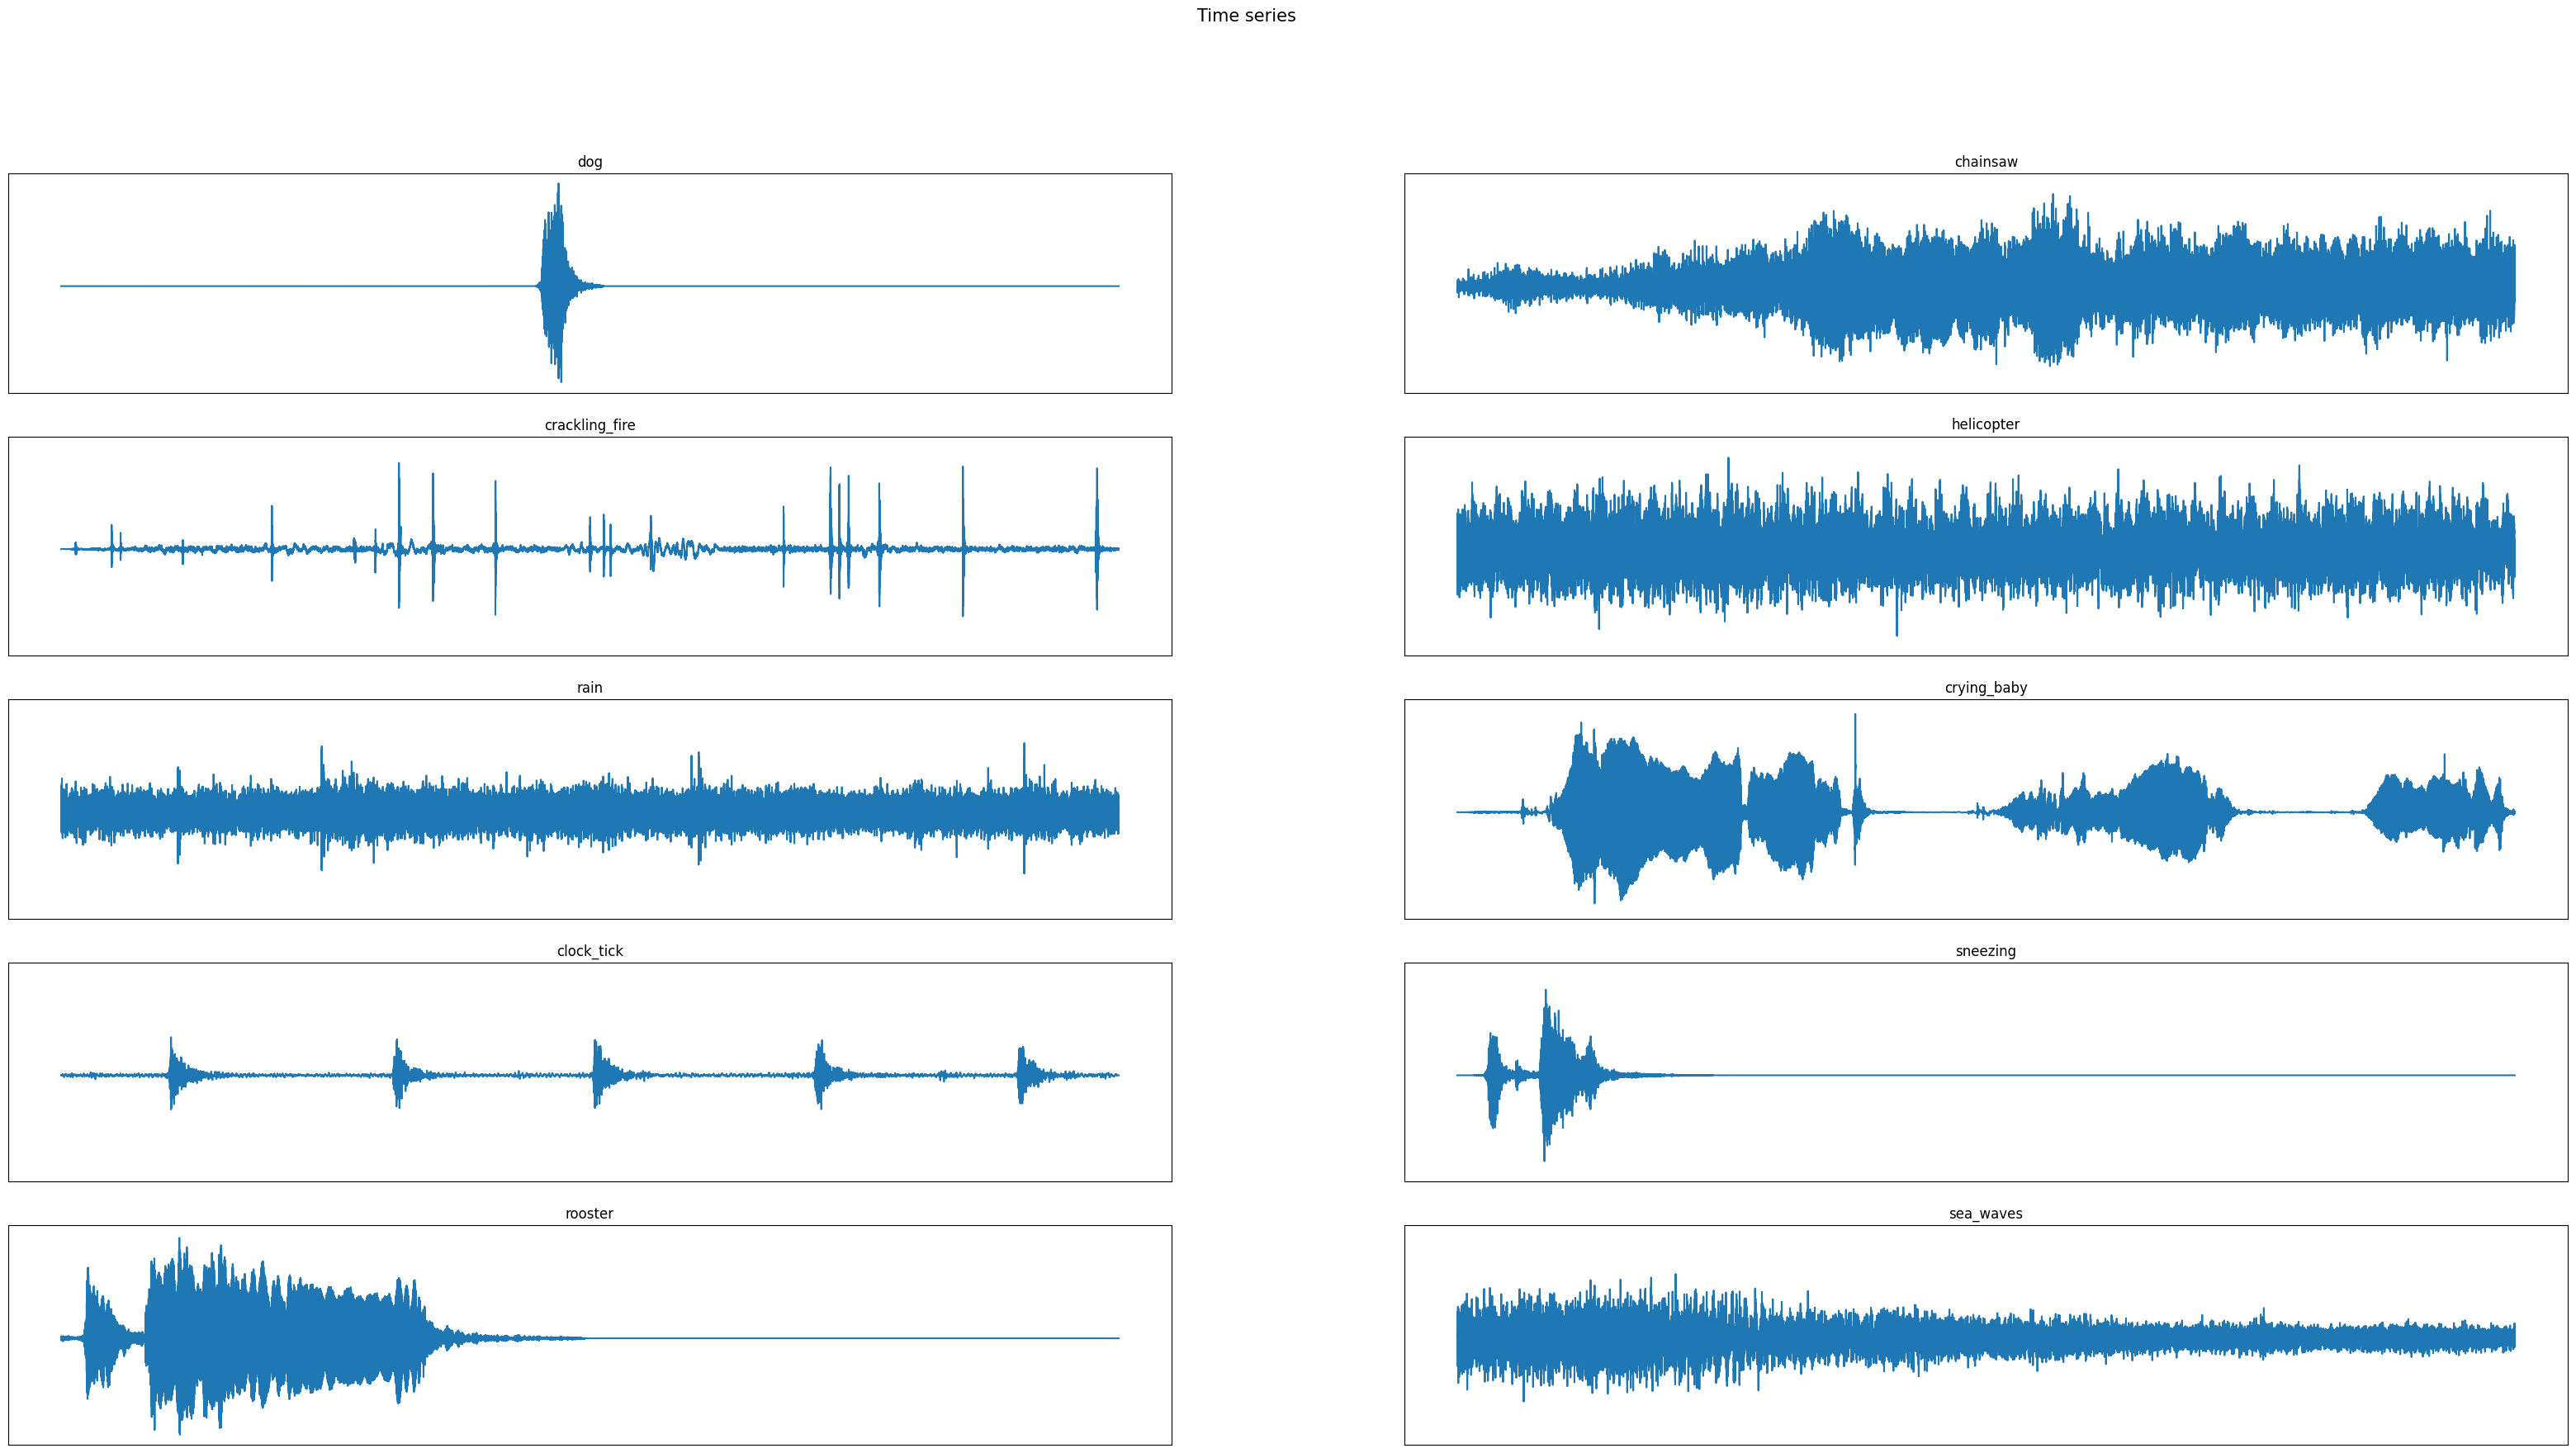

In [60]:
plot_signal(signals)
print(signals)

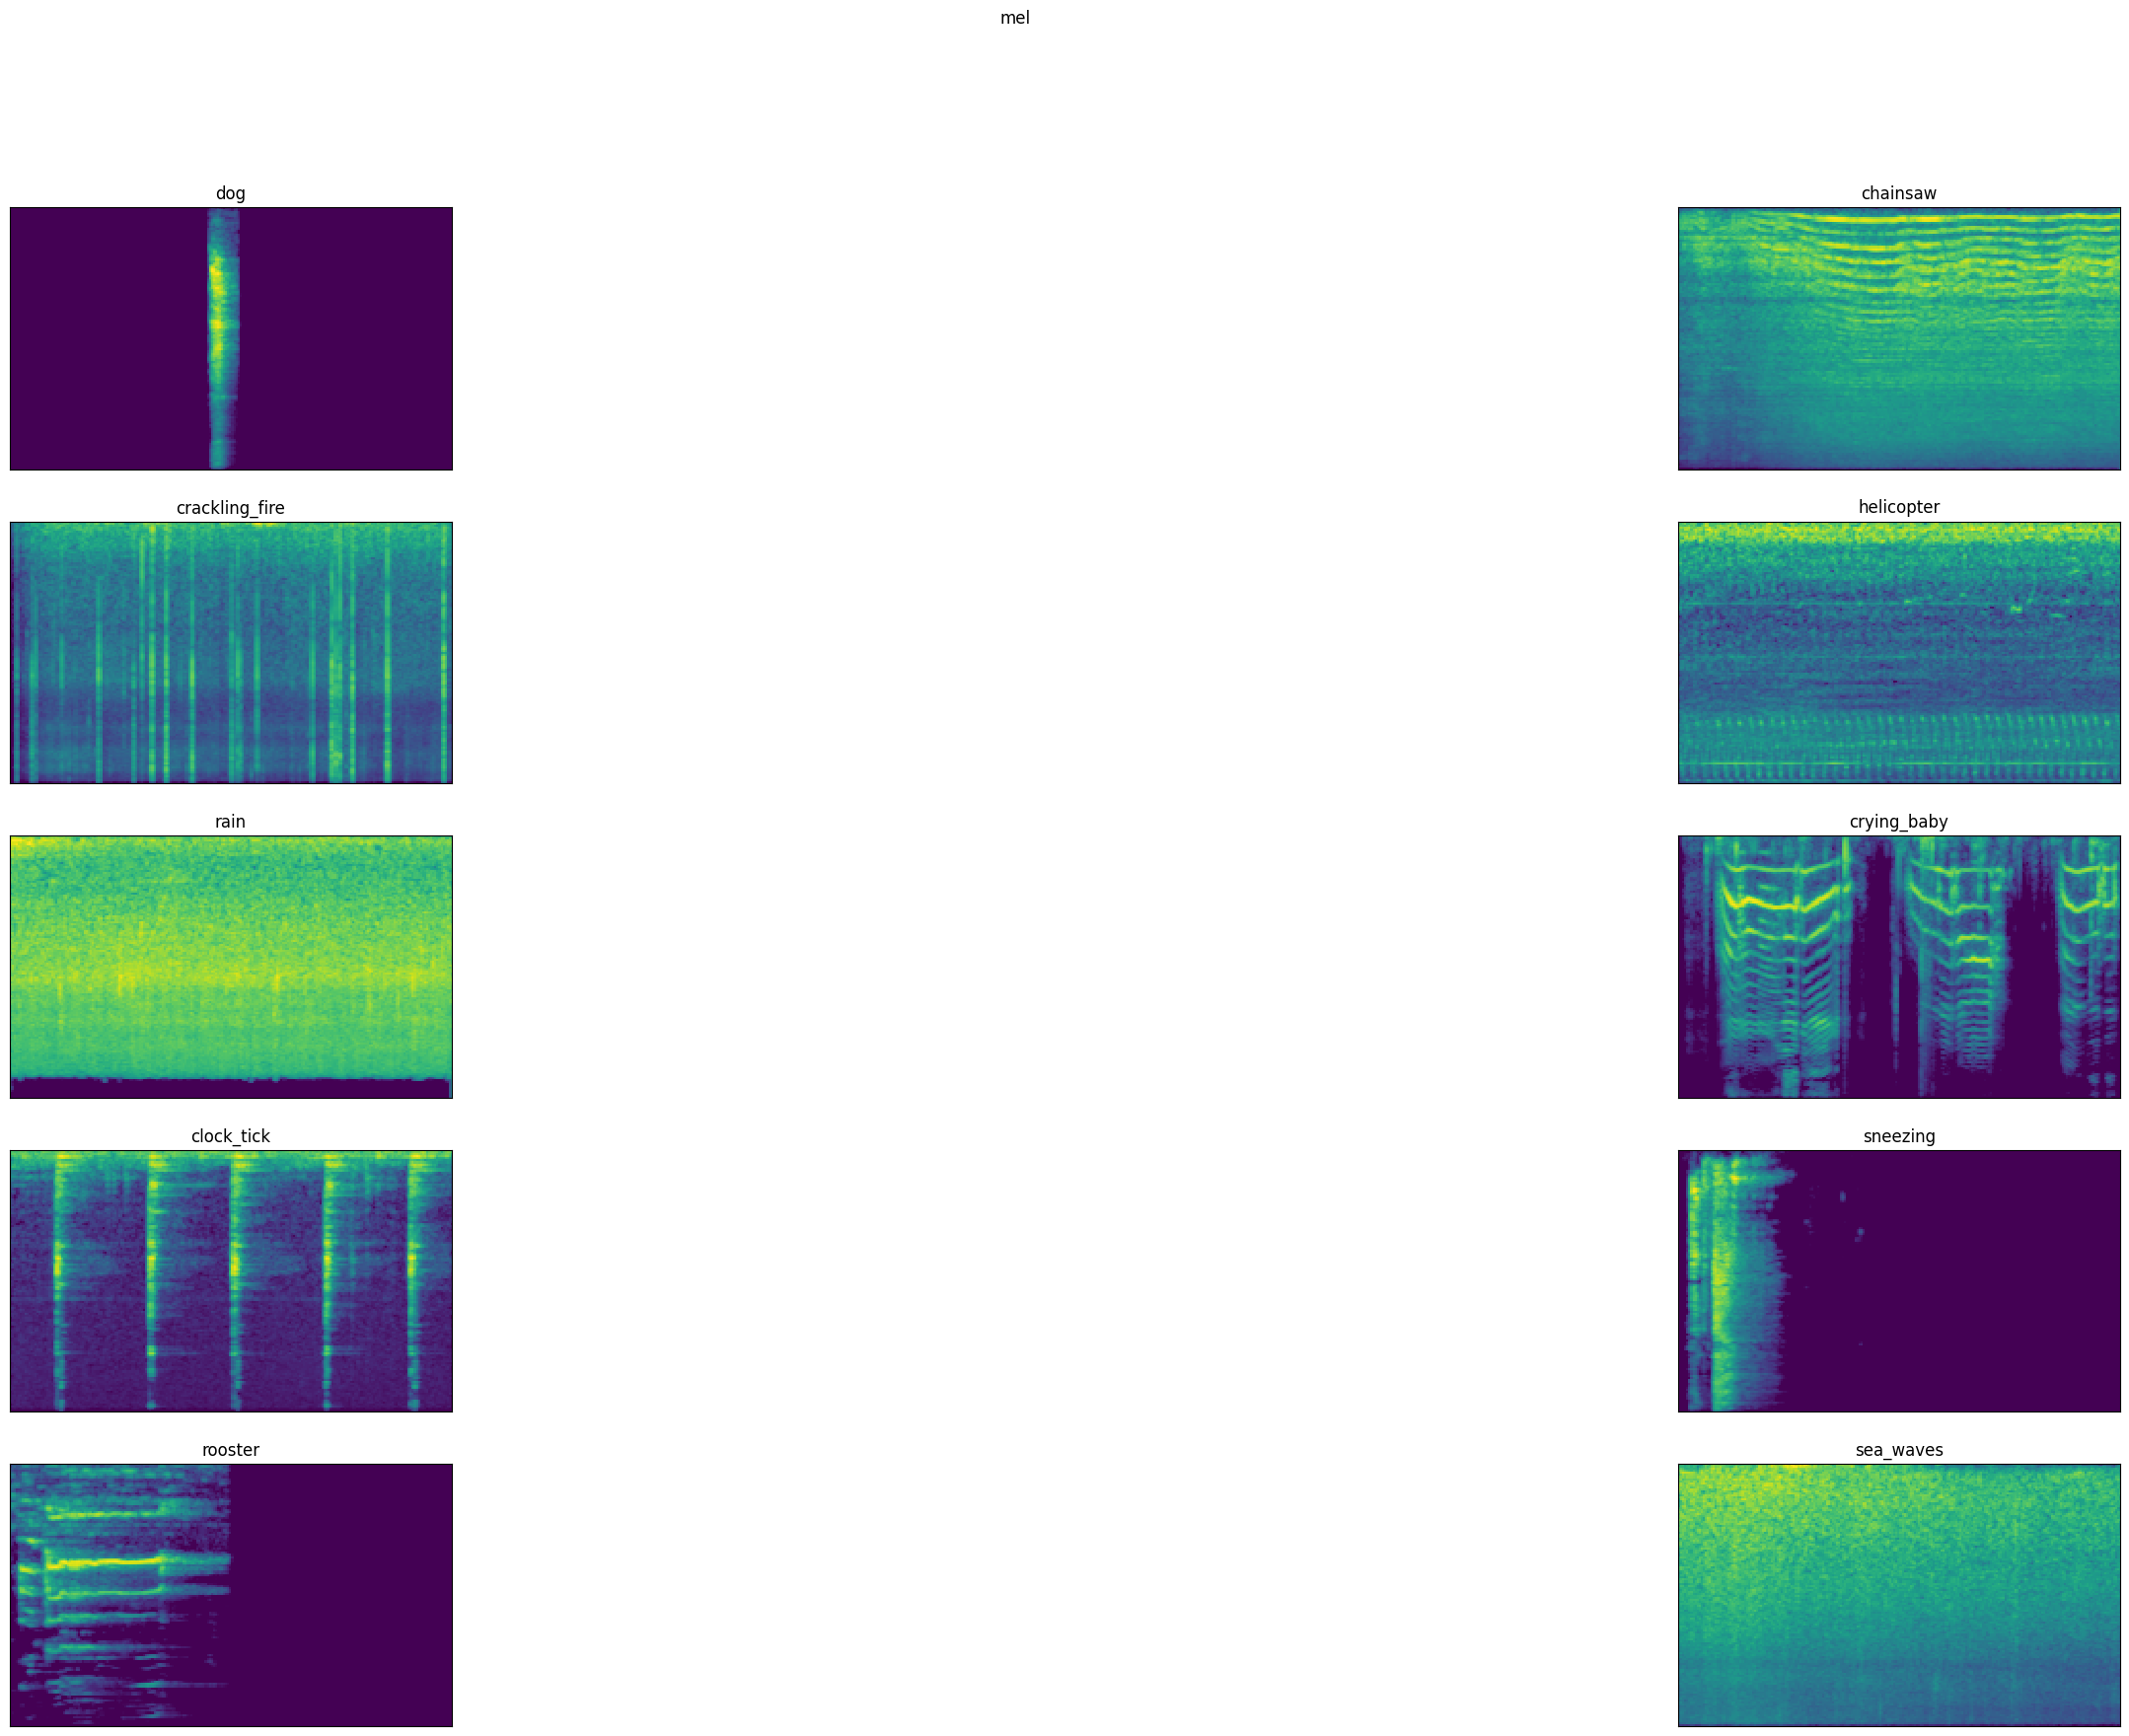

In [15]:
dis_feature(mel_spectrograms)

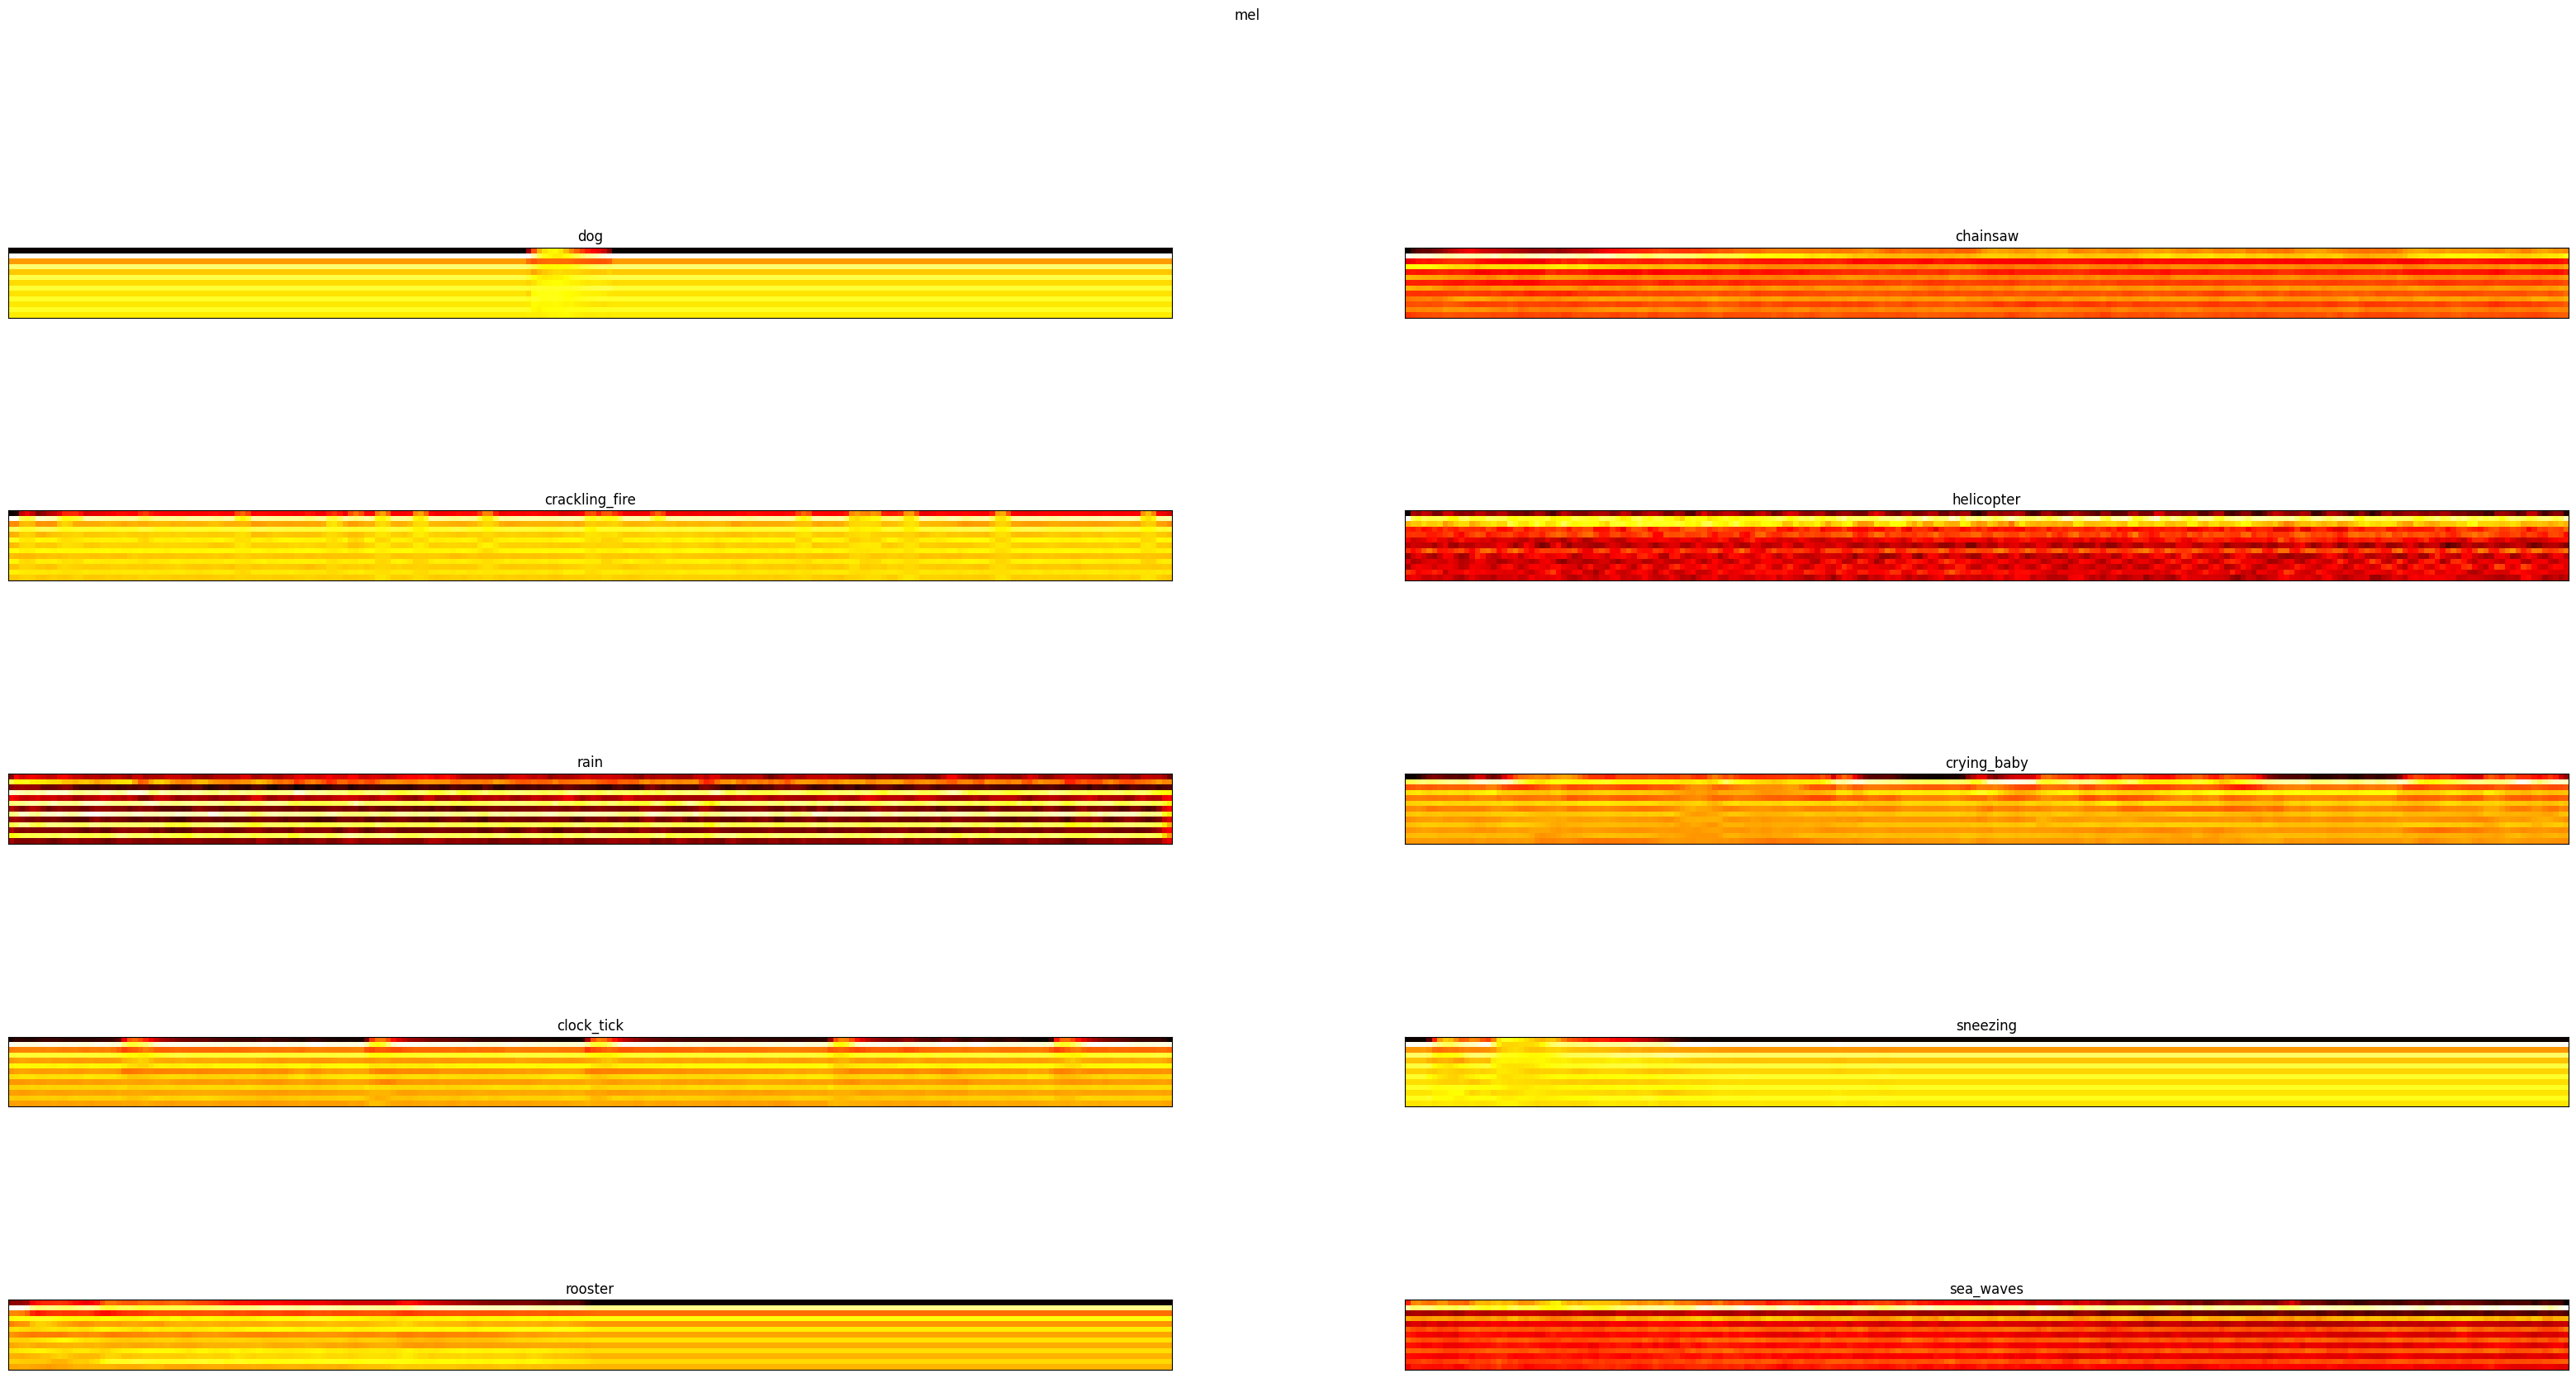

In [16]:
dis_feature(mfccs, cmap='hot')

> Here we extracted two features mel-spectrogram and mfcc.
> I had tried to use both feature for training and mfcc performed very well.
> So, here we are going to use mfcc for training.

## Step 4. Getting Data ready for training

* Now we are going to take a three random 2 second clip from each audio file. this will increase the data size and also classification speed increases.
* the following code iterate through every file and take three random clip from it.

In [17]:
X , y = [] , []
for data in tqdm(df_10.iterrows()):
  sig , sr = librosa.load(DATA_PATH+"/"+data[1][0])
  for i in range(3):
    n = np.random.randint(0, len(sig)-(sr*2))
    sig_ = sig[n : int(n+(sr*2))]
    mfcc_ = librosa.feature.mfcc(y=sig_ , sr=sr, n_mfcc=13)
    X.append(mfcc_)
    y.append(data[1][1])

# convert list to numpy array
X = np.array(X)
y = np.array(y)

#one-hot encoding the target
y = tf.keras.utils.to_categorical(y , num_classes=10)

# our tensorflow model takes input as (no_of_sample , height , width , channel).
# here X has dimension (no_of_sample , height , width).
# So, the below code will reshape it to (no_of_sample , height , width , 1).
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

400it [01:41,  3.94it/s]


In [18]:
X.shape
y.shape

(1200, 13, 87, 1)

(1200, 10)

In [19]:
x_train , x_val , y_train , y_val = train_test_split(X , y ,test_size=0.2, random_state=2020)

## Step 5. Model

In [20]:
INPUTSHAPE = (13,87,1)

In [78]:
model =  models.Sequential([
                          layers.Conv2D(16 , (3,3),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),
                          layers.Conv2D(16, (3,3), activation='relu',padding='valid'),

                          layers.Conv2D(32, (3,3), activation='relu',padding='valid'),
                          layers.Conv2D(32, (3,3), activation='relu',padding='valid'),

                          layers.Conv2D(64, (3,3), activation='relu',padding='valid'),
                          layers.Conv2D(32, (3,3), activation='relu',padding='valid'),
                          layers.GlobalAveragePooling2D(),


                          layers.Dense(32 , activation = 'relu'),
                          layers.Dense(10 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [79]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 11, 85, 16)        160       
                                                                 
 conv2d_43 (Conv2D)          (None, 9, 83, 16)         2320      
                                                                 
 conv2d_44 (Conv2D)          (None, 7, 81, 32)         4640      
                                                                 
 conv2d_45 (Conv2D)          (None, 5, 79, 32)         9248      
                                                                 
 conv2d_46 (Conv2D)          (None, 3, 77, 64)         18496     
                                                                 
 conv2d_47 (Conv2D)          (None, 1, 75, 32)         18464     
                                                                 
 global_average_pooling2d_3  (None, 32)               

In [80]:
%mkdir "cpkt"
%mkdir "logs"
LOGDIR = "logs"
CPKT = "cpkt/"

mkdir: cannot create directory ‘cpkt’: File exists
mkdir: cannot create directory ‘logs’: File exists


In [81]:
#this callback is used to prevent overfitting.
callback_1 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)

#this checkpoint saves the best weights of model at every epoch
callback_2 = tf.keras.callbacks.ModelCheckpoint(
    CPKT, monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch', options=None
)

#this is for tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOGDIR)


In [82]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# OLD
# base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=INPUTSHAPE, name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(x_train,y_train ,
            validation_data=(x_val,y_val),
            epochs=100,)

Shape after base_model: (None, 1, 3, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Epoch 1/100
30/30 [==============================] - 9s 70ms/step - loss: 2.2338 - accuracy: 0.1406 - val_loss: 2.0658 - val_accuracy: 0.2875
Epoch 2/100
30/30 [==============================] - 0s 15ms/step - loss: 2.0182 - accuracy: 0.2969 - val_loss: 1.8444 - val_accuracy: 0.4208
Epoch 3/100
30/30 [==============================] - 0s 13ms/step - loss: 1.8897 - accuracy: 0.3542 - val_loss: 1.7671 - val_accuracy: 0.3333
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 1.8121 - accuracy: 0.3469 - val_loss: 1.7107 - val_accuracy: 0.3625
Epoch 5/100
30/30 [==============================] - 0s 15ms/step - loss: 1.7459 - accuracy: 0.3656 - val_loss: 1.6111 - val_accuracy: 0.5500
Epoch 6/100
30/30 [==============================] - 0s 13ms/step - loss: 1.7138 - accuracy: 0.3875 - val_loss: 1.5990 - val_accuracy: 0.4417
Epoch 7/100
30/30 [==============================] - 0s 15ms

In [83]:
history = model.fit(x_train,y_train ,
            validation_data=(x_val,y_val),
            epochs=100,)

Epoch 1/100
30/30 [==============================] - 3s 21ms/step - loss: 1.8853 - accuracy: 0.3219 - val_loss: 1.3662 - val_accuracy: 0.5042
Epoch 2/100
30/30 [==============================] - 0s 12ms/step - loss: 1.2415 - accuracy: 0.5437 - val_loss: 1.1478 - val_accuracy: 0.5667
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 1.0344 - accuracy: 0.6385 - val_loss: 0.9602 - val_accuracy: 0.6708
Epoch 4/100
30/30 [==============================] - 0s 13ms/step - loss: 0.8535 - accuracy: 0.7125 - val_loss: 0.7794 - val_accuracy: 0.7458
Epoch 5/100
30/30 [==============================] - 0s 9ms/step - loss: 0.7727 - accuracy: 0.7490 - val_loss: 0.7907 - val_accuracy: 0.7500
Epoch 6/100
30/30 [==============================] - 0s 11ms/step - loss: 0.6961 - accuracy: 0.7542 - val_loss: 0.7274 - val_accuracy: 0.7583
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 0.5587 - accuracy: 0.8135 - val_loss: 0.8526 - val_accuracy: 0.7125
Epoch 8/1

In [86]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

if running this in google colab use the following code:

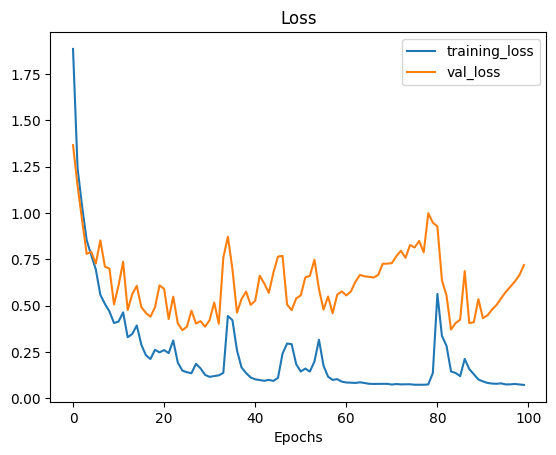

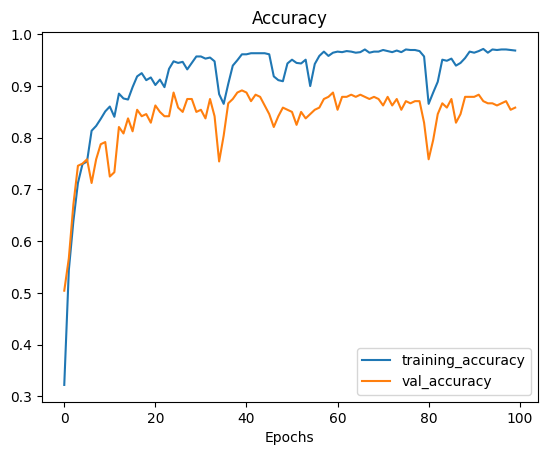

In [87]:
plot_loss_curves(history)

In [88]:
def print_training_stats(history):
    """
    Prints statistics from the training history of a model.
    """
    # Extract loss values from the history
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Extract accuracy values from the history
    final_train_accuracy = history.history['accuracy'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]

    # Find the highest accuracy achieved during training
    max_train_accuracy = max(history.history['accuracy'])

    # Find the highest accuracy achieved during validation
    max_val_accuracy = max(history.history['val_accuracy'])

    # Print the statistics
    print("Final Training Loss:", final_train_loss)
    print("Final Validation Loss:", final_val_loss)
    print("Final Training Accuracy:", final_train_accuracy)
    print("Final Validation Accuracy:", final_val_accuracy)
    print("Highest Training Accuracy:", max_train_accuracy)
    print("Highest Validation Accuracy:", max_val_accuracy)

# Example usage:
# Assuming 'history' is the variable containing training history
# print_training_stats(history)


In [89]:
print_training_stats(history)

Final Training Loss: 0.07247831672430038
Final Validation Loss: 0.7191997766494751
Final Training Accuracy: 0.96875
Final Validation Accuracy: 0.8583333492279053
Highest Training Accuracy: 0.971875011920929
Highest Validation Accuracy: 0.8916666507720947


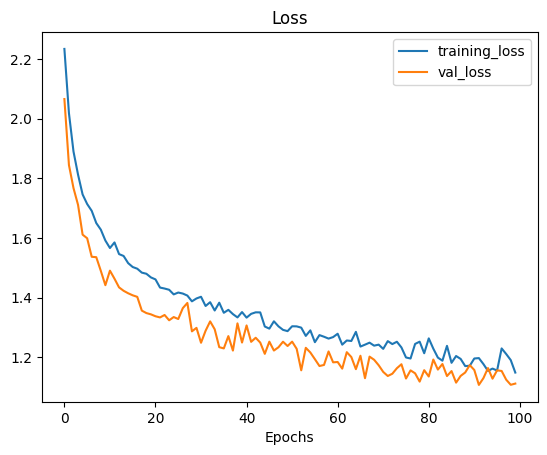

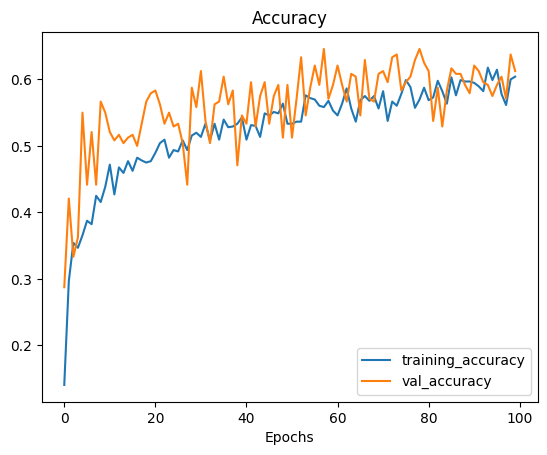

In [92]:
plot_loss_curves(history_10_percent)

In [93]:
print_training_stats(history_10_percent)

Final Training Loss: 1.1487236022949219
Final Validation Loss: 1.1117841005325317
Final Training Accuracy: 0.6041666865348816
Final Validation Accuracy: 0.612500011920929
Highest Training Accuracy: 0.6177083253860474
Highest Validation Accuracy: 0.6458333134651184


In [94]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, None, None, 3)        0         ['input_6[0][0]']             
                                                                                                  
 normalization_5 (Normaliza  (None, None, None, 3)        0         ['rescaling_5[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [70]:
# %tensorboard --logdir="logs"

if running in kaggle kernel use this code.
there are some error displaying tensorboard. So,the below code is taken from this amazing kernel.(https://www.kaggle.com/shivam1600/tensorboard-on-kaggle)

In [28]:
# Download Ngrok to tunnel the tensorboard port to an external port
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

# Run tensorboard as well as Ngrox (for tunneling as non-blocking processes)
import os
import multiprocessing


pool = multiprocessing.Pool(processes = 10)
results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
                        for cmd in [
                        f"tensorboard --logdir=\"logs\" --host 0.0.0.0 --port 6006 &",
                        "./ngrok http 6006 &"
                        ]]

--2023-12-17 14:52:55--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 52.202.168.65, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  40.2MB/s    in 0.3s    

2023-12-17 14:52:56 (40.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


> use the link in the output of the following section to view in tensorboard.

In [29]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [90]:
!pip freeze > requirements.txt

In [91]:
!ls

cpkt  drive  logs  ngrok  ngrok-stable-linux-amd64.zip	requirements.txt  sample_data
